In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

# Google Ads Campaign Dataset

### Load the Data

In [2]:
df = pd.read_excel('Omnify-Analyst-Intership-Task.xlsx')
df.head()

Week                  Campaign                            Ad group  \
0 2021-01-25       EK_Generic_Swimming       Pool_Reservation_System_Exact   
1 2021-01-25       EK_Generic_Swimming              Pool_Booking_App_Exact   
2 2021-01-25  EK_Generic_Quad-Tok_Yoga  Yoga_Studio_Booking_Software_Broad   
3 2021-01-25       EK_Generic_Swimming     Pool_Scheduling_Software_Phrase   
4 2021-01-25    EK_Generic_Swimming_UK     Pool_Reservation_Software_Broad   

  Keyword type                Search Keyword Currency  Clicks  Impressions  \
0        Exact       pool reservation system      USD       2           17   
1        Exact              pool booking app      USD       1           13   
2        Broad  yoga studio booking software      USD       4          154   
3       Phrase      pool scheduling software      USD       2            8   
4        Broad     pool reservation software      USD       2           13   

   Cost ($)  Leads  Prospects Payment ($) Payment Date Country  
0     38.33      0          1        $980   2021-02-03     USA  
1     11.70      0          0         NaN          NaT     USA  
2     45.13      0          1      $1,188   2021-03-13     USA  
3     23.91      0          0         NaN          NaT     USA  
4      4.89      0          0         NaN          NaT     USA

In [3]:
data = df.copy()

### Some information of the Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     8 non-null      object        
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memo

**Observation**
- The Dataset contains 418 rows and 14 Columns
- Dataset contains 7 Categorical columns, 2 Datetime columns, 5 Numerical Coluns
- Search Keyword, Payment ($), Payment Date Contains Missing Values

### Check for Column wise Null Values

In [5]:
data.isnull().sum()

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64

Payment ($), Payment Date Contains more than 95% Null Values

### Statistical Inference

In [6]:
data.describe(include='O')

Campaign                              Ad group  \
count                   418                                   418   
unique                   15                                    27   
top     EK_Generic_Swimming  Reservation_Management_System_Phrase   
freq                     97                                    91   

       Keyword type                 Search Keyword Currency Payment ($)  \
count           418                            412      418           8   
unique            3                             20        1           4   
top           Exact  reservation management system      USD        $980   
freq            184                             90      418           3   

       Country  
count      418  
unique       1  
top        USA  
freq       418

In [7]:
data.describe()

Clicks  Impressions    Cost ($)       Leads   Prospects
count  418.000000   418.000000  418.000000  418.000000  418.000000
mean     0.925837    16.662679    6.671483    0.028708    0.050239
std      1.900840    46.743636   14.253019    0.167185    0.285312
min      0.000000     0.000000    0.000000    0.000000    0.000000
25%      0.000000     1.000000    0.000000    0.000000    0.000000
50%      0.000000     3.000000    0.000000    0.000000    0.000000
75%      1.000000    12.000000    6.800000    0.000000    0.000000
max     12.000000   357.000000   92.090000    1.000000    3.000000

### Impute the missing values

In [8]:
data.drop(['Payment ($)', 'Payment Date'], axis=1, inplace=True)
data['Search Keyword'].fillna('Not Provided', inplace=True)

### Solving Tasks Assigned

1 - Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.

In [9]:
data['Week'] = pd.to_datetime(data['Week'])

weekly_report = data.groupby('Week').agg({
    'Cost ($)': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum'
})


weekly_report['ROAS'] = weekly_report['Prospects'] / weekly_report['Cost ($)']


monthly_report = data.groupby(data['Week'].dt.to_period('M')).agg({
    'Cost ($)': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum'
})


monthly_report['ROAS'] = monthly_report['Prospects'] / monthly_report['Cost ($)']

print("Weekly Report:")
print(weekly_report)

print("\nMonthly Report:")
print(monthly_report)

Weekly Report:
            Cost ($)  Leads  Prospects  Clicks  Impressions      ROAS
Week                                                                 
2021-01-25    154.79      1          2      15          319  0.012921
2021-02-01    192.58      0          1      19          373  0.005193
2021-02-08    216.13      0          1      21          364  0.004627
2021-02-15    235.30      0          2      35          671  0.008500
2021-02-22    190.90      0          1      22          478  0.005238
2021-03-01    141.40      0          1      14          407  0.007072
2021-03-08    258.20      3          1      34          503  0.003873
2021-03-15    184.36      1          0      22          468  0.000000
2021-03-22    308.73      1          4      46          659  0.012956
2021-03-29    172.11      0          0      39          586  0.000000
2021-04-05    176.96      2          0      29          461  0.000000
2021-04-12    137.21      1          4      24          324  0.029152
2021-

2 - Which is the most profitable channel

In [10]:
# Calculate returns on ad spends (ROAS) for each channel
data['ROAS'] = data['Prospects'] / data['Cost ($)']

channel_roas = data.groupby('Campaign')['ROAS'].mean()

most_profitable_channel = channel_roas.idxmax()
highest_roas = channel_roas.max()

print(f"The most profitable channel is '{most_profitable_channel}' with a ROAS of {highest_roas:.4f}.")

The most profitable channel is 'EK_Generic_Swimming' with a ROAS of 0.0096.


3 - Which category/keyword is the most profitable

In [11]:
keyword_roas = data.groupby('Search Keyword')['ROAS'].mean()

most_profitable_keyword = keyword_roas.idxmax()
highest_roas = keyword_roas.max()

print(f"The most profitable category/keyword is '{most_profitable_keyword}' with a ROAS of {highest_roas:.4f}.")

The most profitable category/keyword is 'pool reservation software' with a ROAS of 0.0160.


4 - Look for insights by analyzing data points on time series graphs

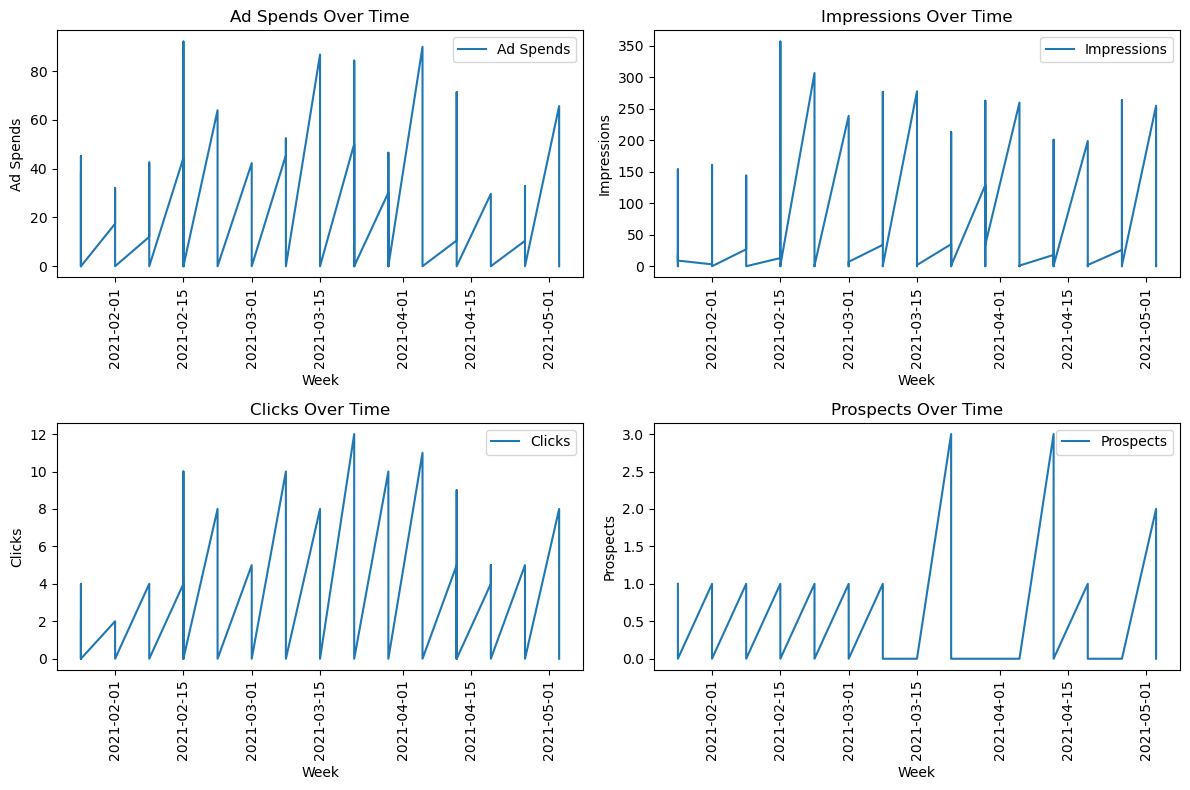

In [12]:
df['Week'] = pd.to_datetime(df['Week'])
# (Run only once at a time above code )
df.set_index('Week', inplace=True)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df['Cost ($)'], label='Ad Spends')
plt.title('Ad Spends Over Time')
plt.xlabel('Week')
plt.ylabel('Ad Spends')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['Impressions'], label='Impressions')
plt.title('Impressions Over Time')
plt.xlabel('Week')
plt.xticks(rotation=90)
plt.ylabel('Impressions')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['Clicks'], label='Clicks')
plt.title('Clicks Over Time')
plt.xlabel('Week')
plt.ylabel('Clicks')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['Prospects'], label='Prospects')
plt.title('Prospects Over Time')
plt.xlabel('Week')
plt.ylabel('Prospects')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

5 - Analyse the Impact of geography

In [13]:
grouped_data = data.groupby('Country').mean()
print(grouped_data[['Clicks', 'Impressions', 'Prospects', 'Cost ($)']])

           Clicks  Impressions  Prospects  Cost ($)
Country                                            
USA      0.925837    16.662679   0.050239  6.671483


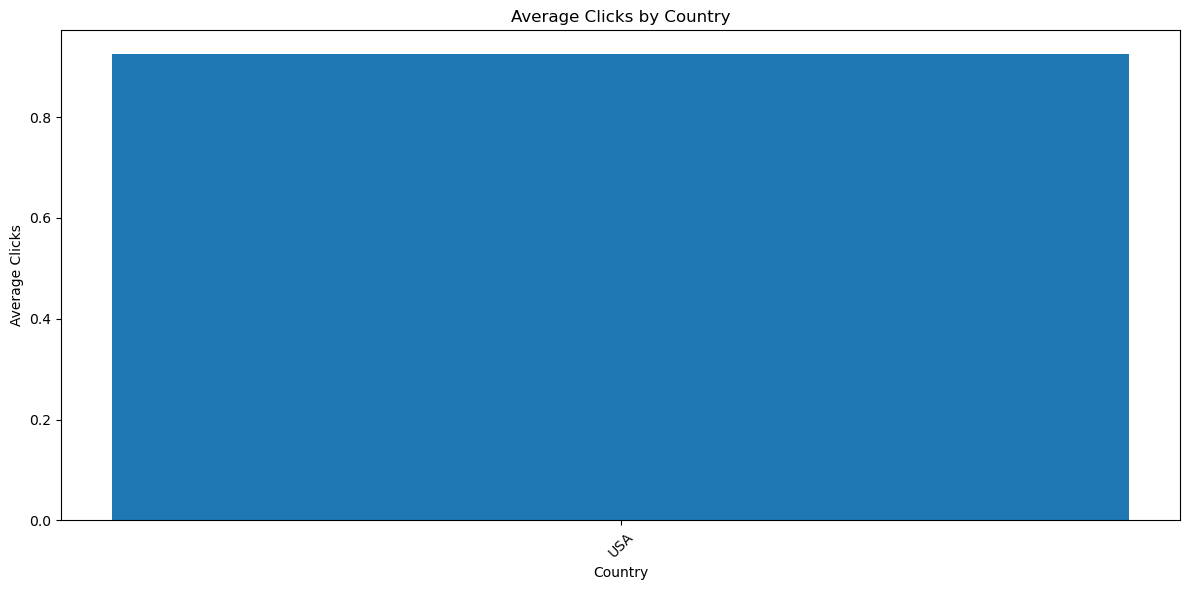

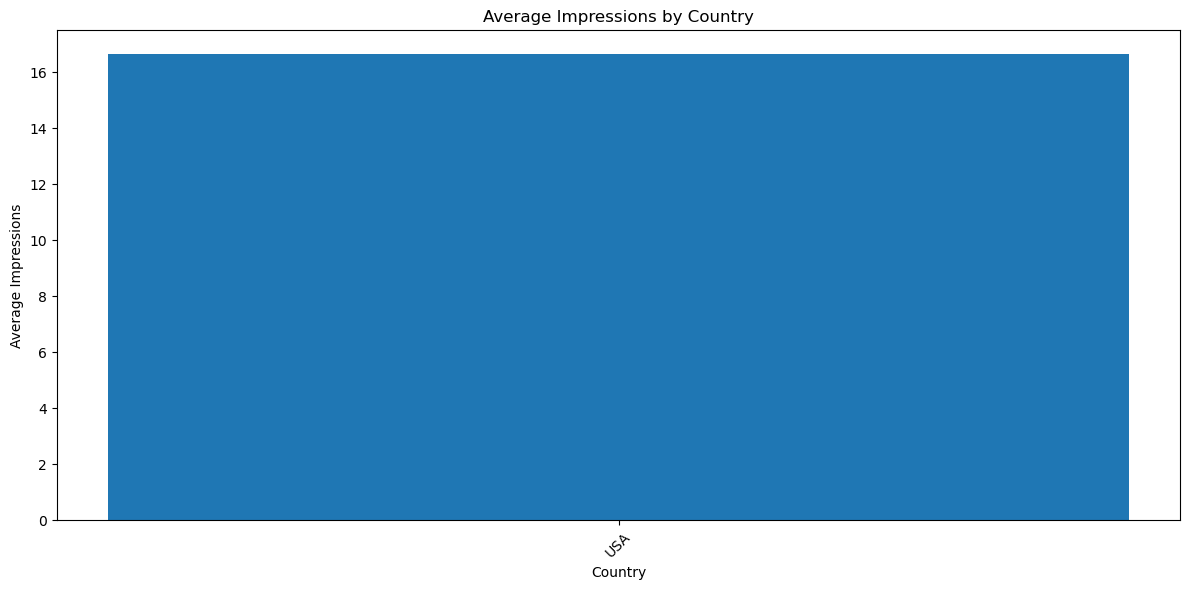

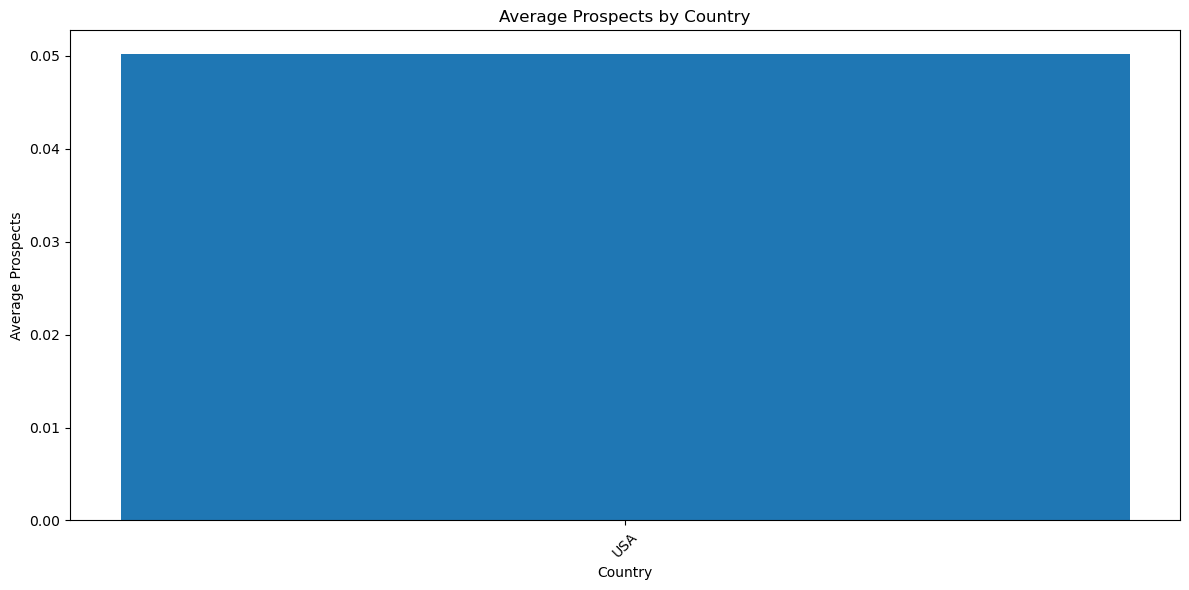

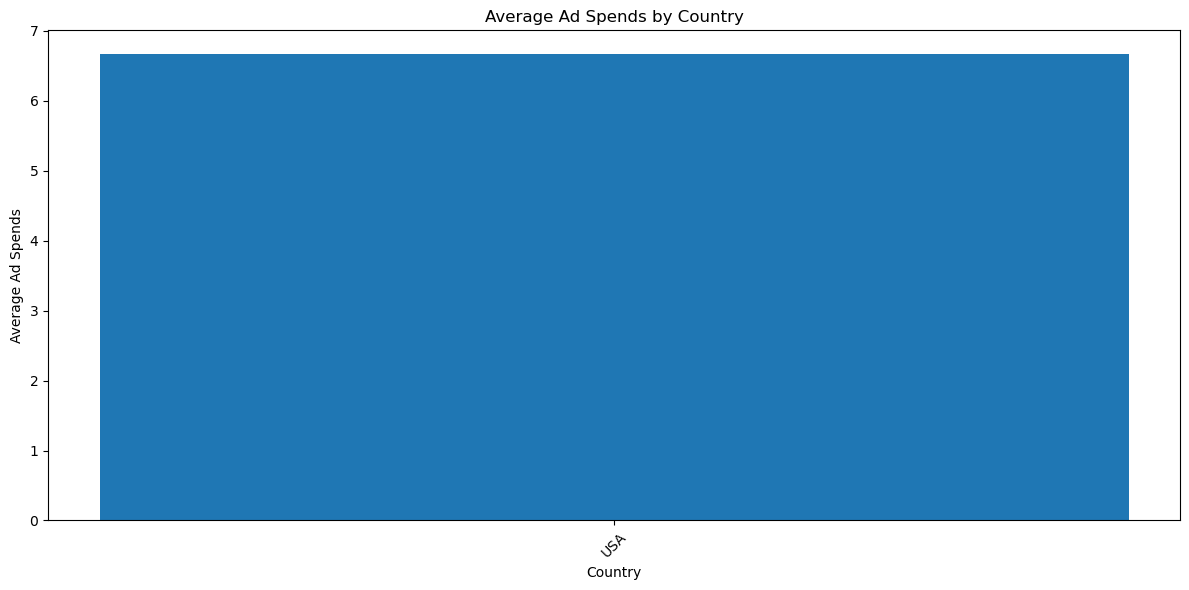

In [14]:
import matplotlib.pyplot as plt

# Plot bar chart for average clicks by country
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data['Clicks'])
plt.xlabel('Country')
plt.ylabel('Average Clicks')
plt.title('Average Clicks by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar chart for average impressions by country
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data['Impressions'])
plt.xlabel('Country')
plt.ylabel('Average Impressions')
plt.title('Average Impressions by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar chart for average prospects by country
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data['Prospects'])
plt.xlabel('Country')
plt.ylabel('Average Prospects')
plt.title('Average Prospects by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar chart for average ad spends by country
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data['Cost ($)'])
plt.xlabel('Country')
plt.ylabel('Average Ad Spends')
plt.title('Average Ad Spends by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Self evaluation 

1 - Does the performance of ad campaigns vary significantly between different campaign types?

In [15]:
# Perform ANOVA test for Clicks by Campaign type
campaign_clicks = data.groupby('Campaign')['Clicks'].mean()
f_statistic, p_value = stats.f_oneway(*[data[data['Campaign']==campaign]['Clicks'] for campaign in campaign_clicks.index])

print('ANOVA Results for Clicks by Campaign type:')
print('F-statistic:', f_statistic)
print('p-value:', p_value)

ANOVA Results for Clicks by Campaign type:
F-statistic: 3.376664077107823
p-value: 3.569001822299429e-05


2 - Can we predict the Type of prospects generated based on ad spends and identify the Most Significant Feature Contributing Most(Feature Importance) and other metrics using machine learning?

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report

X = data[['Clicks', 'Impressions', 'Cost ($)']]
y = data['Prospects']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        79
           1       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         0

    accuracy                           0.93        84
   macro avg       0.32      0.33      0.32        84
weighted avg       0.89      0.93      0.91        84



In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
data.head()

Week                  Campaign                            Ad group  \
0 2021-01-25       EK_Generic_Swimming       Pool_Reservation_System_Exact   
1 2021-01-25       EK_Generic_Swimming              Pool_Booking_App_Exact   
2 2021-01-25  EK_Generic_Quad-Tok_Yoga  Yoga_Studio_Booking_Software_Broad   
3 2021-01-25       EK_Generic_Swimming     Pool_Scheduling_Software_Phrase   
4 2021-01-25    EK_Generic_Swimming_UK     Pool_Reservation_Software_Broad   

  Keyword type                Search Keyword Currency  Clicks  Impressions  \
0        Exact       pool reservation system      USD       2           17   
1        Exact              pool booking app      USD       1           13   
2        Broad  yoga studio booking software      USD       4          154   
3       Phrase      pool scheduling software      USD       2            8   
4        Broad     pool reservation software      USD       2           13   

   Cost ($)  Leads  Prospects Country      ROAS  
0     38.33      0          1     USA  0.026089  
1     11.70      0          0     USA  0.000000  
2     45.13      0          1     USA  0.022158  
3     23.91      0          0     USA  0.000000  
4      4.89      0          0     USA  0.000000

In [19]:
for i in data.select_dtypes(include='O'):
    print(i,'=',data[i].unique())
    print()

Campaign = ['EK_Generic_Swimming' 'EK_Generic_Quad-Tok_Yoga' 'EK_Generic_Swimming_UK'
 'EK_Generic_Swimming_Canada' 'EK_Generic_Tri-Tok_Reservation'
 'EK_Generic_Quad-Tok_Yoga_Singapore'
 'EK_Generic_Tri-Tok_Reservation_Canada'
 'EK_Generic_Tri-Tok_Reservation_UK' 'EK_Generic_Tri-Tok_Reservation_UAE'
 'EK_Generic_Tri-Tok_Reservation_Singapore' 'EK_Generic_Quad-Tok_Pilates'
 'EK_Generic_Tri-Tok_Yoga_Singapore' 'EK_Generic_Tri-Tok_Pilates'
 'EK_Generic_Tri-Tok_Yoga' 'EK_Generic_Swimming_Singapore']

Ad group = ['Pool_Reservation_System_Exact' 'Pool_Booking_App_Exact'
 'Yoga_Studio_Booking_Software_Broad' 'Pool_Scheduling_Software_Phrase'
 'Pool_Reservation_Software_Broad' 'Pool_Reservation_Software_Exact'
 'Reservation_Management_System_Phrase'
 'Reservation_Management_System_Exact'
 'Swimming_Pool_Reservation_System_Exact'
 'Yoga_Studio_Booking_Software_Exact' 'Swimming_Pool_Booking_System_Exact'
 'Yoga_Studio_Generic_Software_Phrase'
 'Pilates_Studio_Management_Software_Exact'
 'Pool_R

In [20]:
data['Keyword type']=data['Keyword type'].map({'Exact':0,'Broad':1 ,'Phrase':2})

In [22]:
data['Prospects'].unique()

array([1, 0, 3, 2], dtype=int64)

In [23]:
data.select_dtypes(include=np.number)

Keyword type  Clicks  Impressions  Cost ($)  Leads  Prospects      ROAS
0               0       2           17     38.33      0          1  0.026089
1               0       1           13     11.70      0          0  0.000000
2               1       4          154     45.13      0          1  0.022158
3               2       2            8     23.91      0          0  0.000000
4               1       2           13      4.89      0          0  0.000000
..            ...     ...          ...       ...    ...        ...       ...
413             1       0            1      0.00      0          0       NaN
414             0       0            6      0.00      0          0       NaN
415             0       0            0      0.00      0          0       NaN
416             1       0            1      0.00      0          0       NaN
417             0       0            3      0.00      0          0       NaN

[418 rows x 7 columns]

In [25]:
x=data[['Keyword type','Clicks','Impressions','Cost ($)']]
y=data['Prospects']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

y_pred = rfc_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print('Mean Squared Error:', mse)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        79
           1       0.00      0.00      0.00         5

    accuracy                           0.94        84
   macro avg       0.47      0.50      0.48        84
weighted avg       0.88      0.94      0.91        84



In [26]:
X

Clicks  Impressions  Cost ($)
0         2           17     38.33
1         1           13     11.70
2         4          154     45.13
3         2            8     23.91
4         2           13      4.89
..      ...          ...       ...
413       0            1      0.00
414       0            6      0.00
415       0            0      0.00
416       0            1      0.00
417       0            3      0.00

[418 rows x 3 columns]

<Axes: >

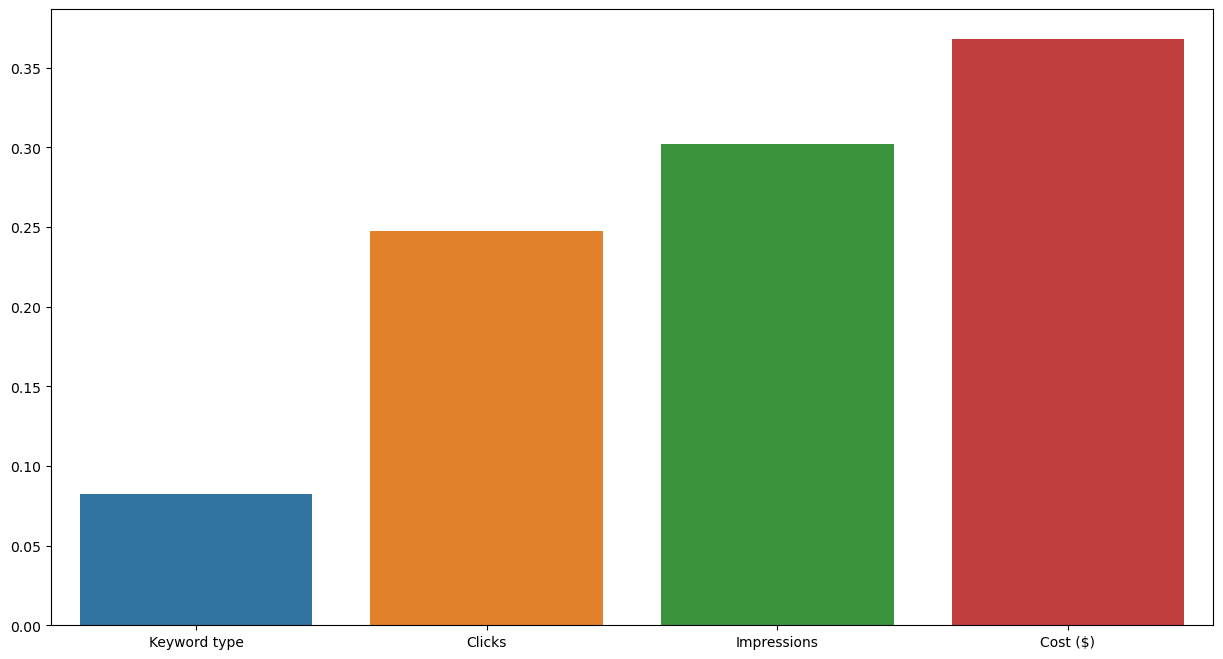

In [27]:
sns.barplot(x=x.columns,y=rfc_model.feature_importances_)

3 -  Are there any trends or patterns in the time series data (clicks, impressions, prospects, and ad spends) over different weeks or months?

In [28]:
data=pd.read_excel('Omnify-Analyst-Intership-Task.xlsx')

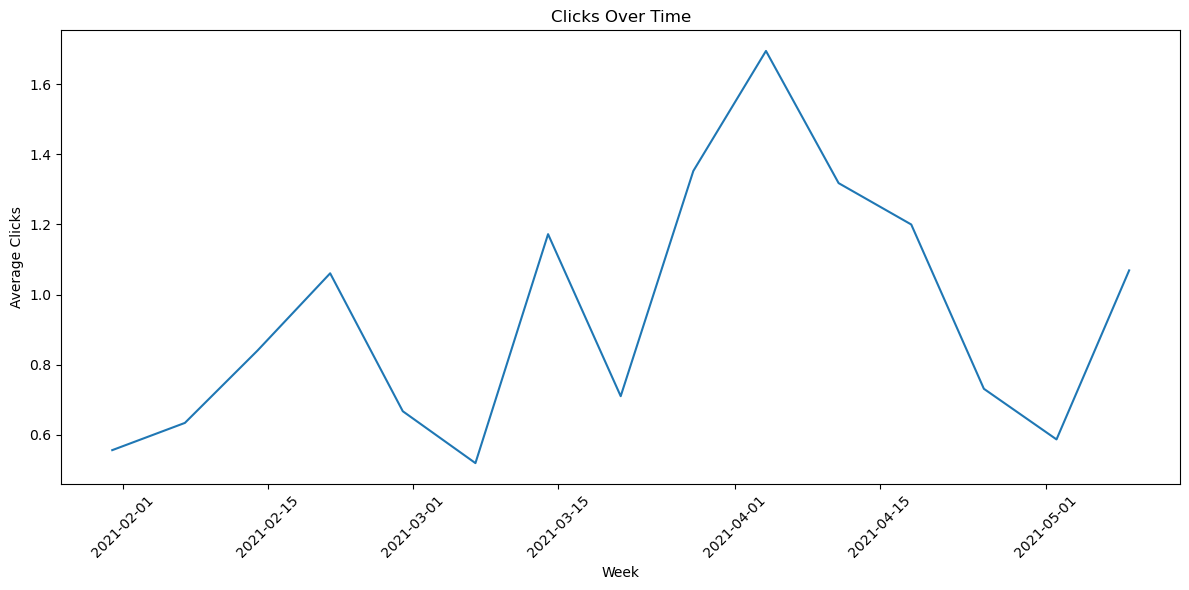

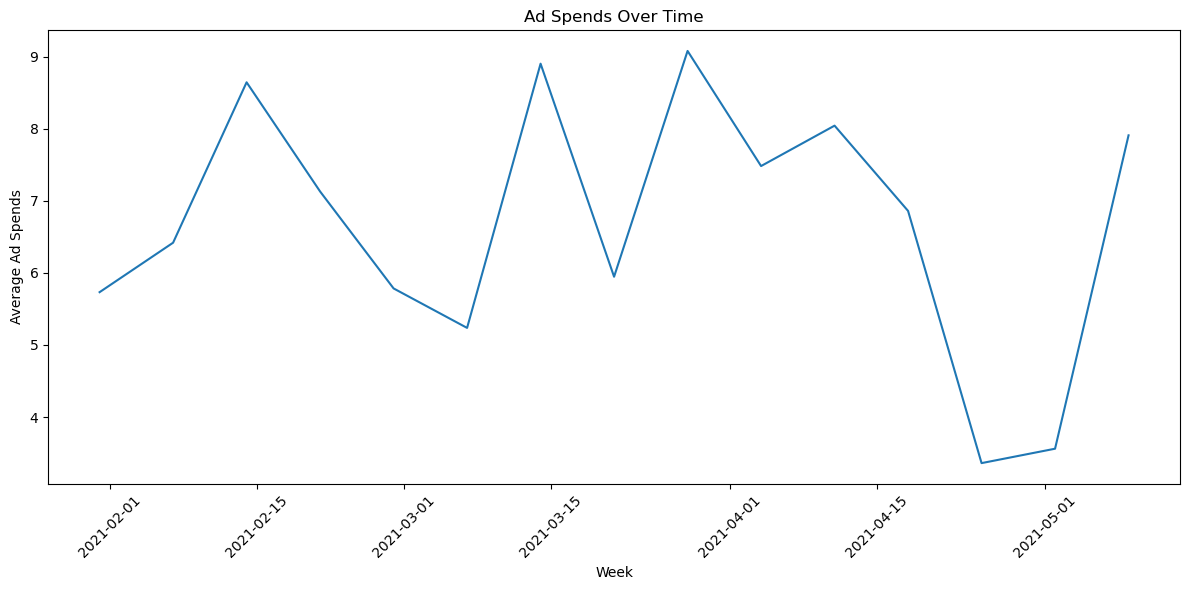

In [29]:
# Group the data by week and calculate the average values of key metrics
weekly_data = data.resample('W', on='Week').mean()

# Plot line chart for clicks over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['Clicks'])
plt.xlabel('Week')
plt.ylabel('Average Clicks')
plt.title('Clicks Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot line chart for ad spends over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['Cost ($)'])
plt.xlabel('Week')
plt.ylabel('Average Ad Spends')
plt.title('Ad Spends Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Additional Visualisations

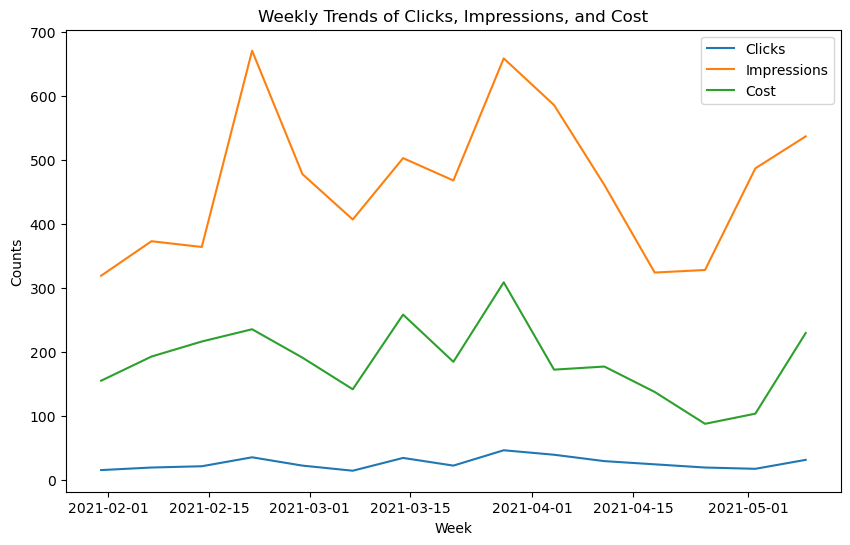

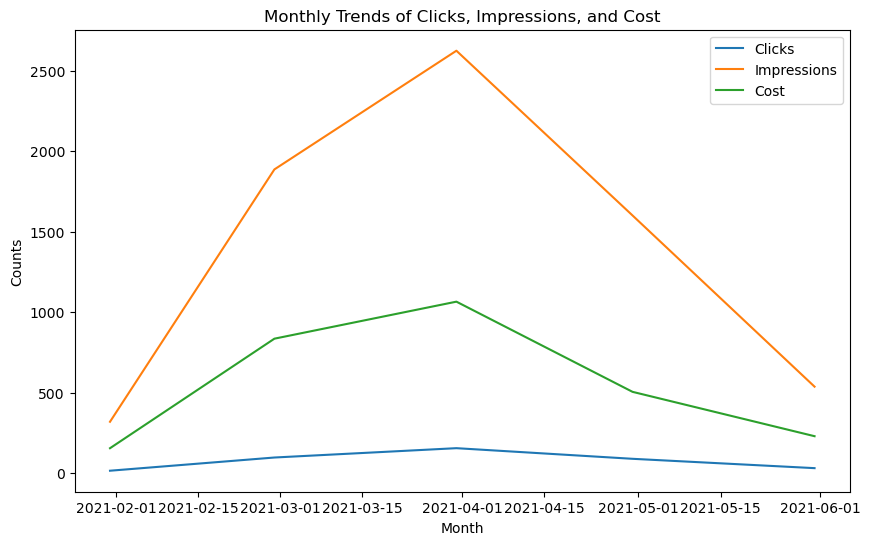

In [30]:
import matplotlib.pyplot as plt

# Plot weekly trends
weekly_data = data.resample('W', on='Week').sum()
plt.figure(figsize=(10, 6))
plt.plot(weekly_data.index, weekly_data['Clicks'], label='Clicks')
plt.plot(weekly_data.index, weekly_data['Impressions'], label='Impressions')
plt.plot(weekly_data.index, weekly_data['Cost ($)'], label='Cost')
plt.xlabel('Week')
plt.ylabel('Counts')
plt.title('Weekly Trends of Clicks, Impressions, and Cost')
plt.legend()
plt.show()

# Plot monthly trends
monthly_data = data.resample('M', on='Week').sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Clicks'], label='Clicks')
plt.plot(monthly_data.index, monthly_data['Impressions'], label='Impressions')
plt.plot(monthly_data.index, monthly_data['Cost ($)'], label='Cost')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Monthly Trends of Clicks, Impressions, and Cost')
plt.legend()
plt.show()

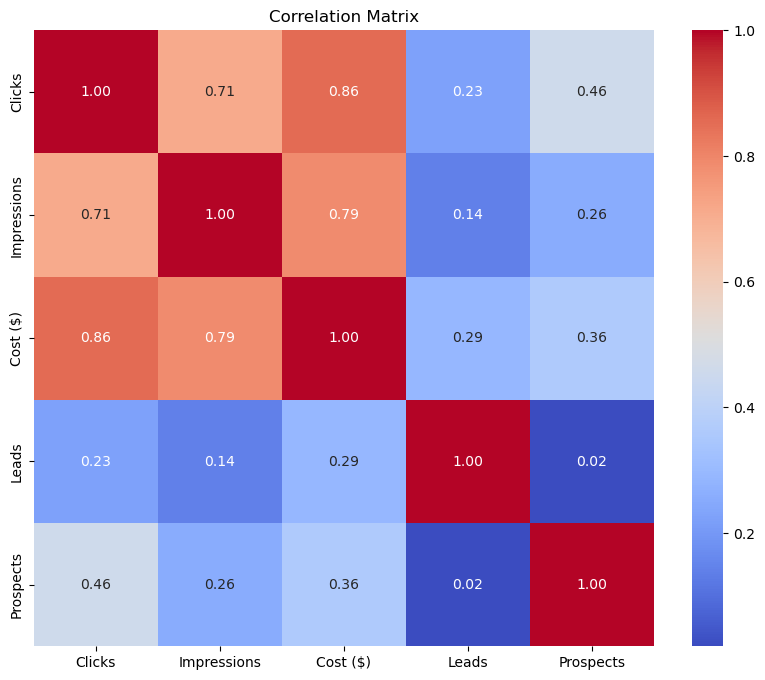

In [31]:
# corelation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [33]:
plt.style.use('ggplot')

In [34]:
import plotly.express as px

country_metrics = data.groupby('Country').sum().reset_index()
fig = px.choropleth(country_metrics, locations='Country', locationmode='country names', color='Prospects', 
                    hover_name='Country', projection='natural earth', title='Prospects by Country')
fig.show()

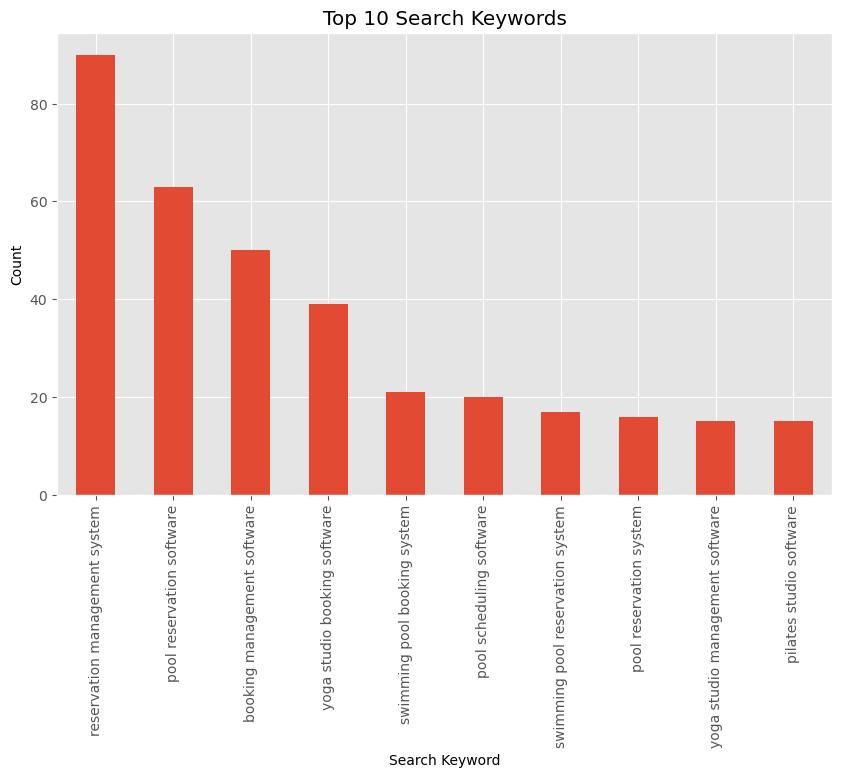

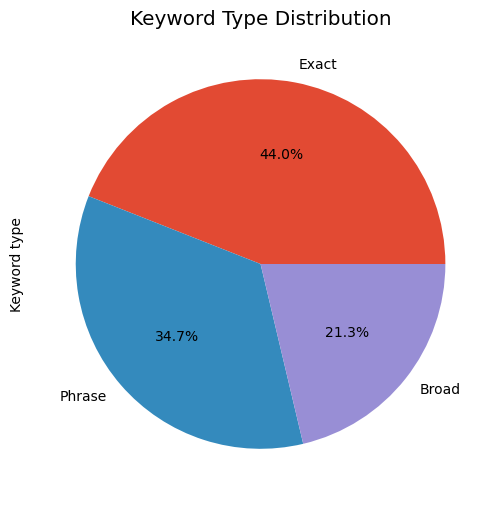

In [35]:
plt.figure(figsize=(10, 6))
data['Search Keyword'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Search Keyword')
plt.ylabel('Count')
plt.title('Top 10 Search Keywords')
plt.show()

plt.figure(figsize=(8, 6))
df['Keyword type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Keyword Type Distribution')
plt.show()

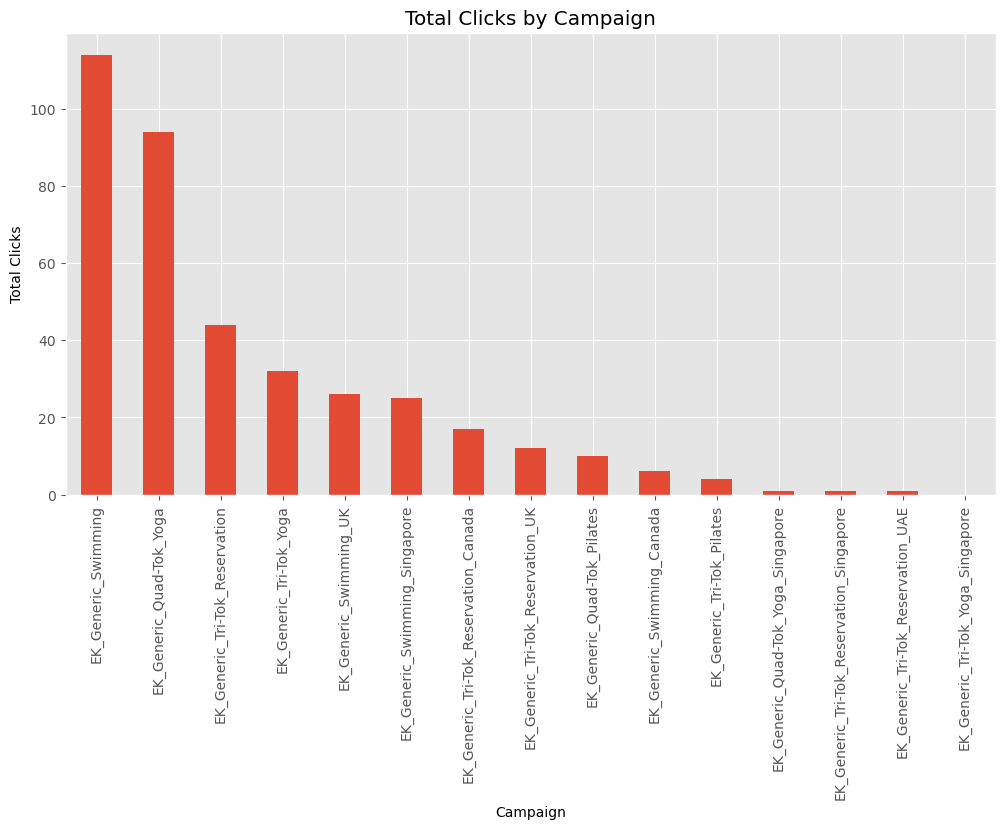

In [36]:
plt.figure(figsize=(12, 6))
data.groupby('Campaign')['Clicks'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Campaign')
plt.ylabel('Total Clicks')
plt.title('Total Clicks by Campaign')
plt.show()

# Listing Site Dataset

In [39]:
listing_site_df=pd.read_excel('Omnify-Analyst-Intership-Task.xlsx', sheet_name='Listing Site Data')
listing_site_df.head()

Product Name          Categories       Date of Report  Average Position  \
0       Omnify            Coaching  2020-10-20 00:00:00              13.0   
1       Omnify        Dance Studio  2020-10-20 00:00:00              20.0   
2       Omnify    Personal Trainer  2020-10-20 00:00:00               6.0   
3       Omnify          Scheduling  2020-10-20 00:00:00              59.0   
4       Omnify  Class Registration  2020-10-21 00:00:00               6.0   

   Clicks  Leads  Money Spent ($)   Channel        Location  Prospects Paid  \
0     1.0    NaN              2.0  Capterra   UNITED STATES        NaN  NaN   
1     1.0    NaN              2.0  Capterra  UNITED KINGDOM        NaN  NaN   
2     1.0    NaN              2.0  Capterra       SINGAPORE        NaN  NaN   
3     1.0    NaN              2.0    GetApp   UNITED STATES        NaN  NaN   
4     1.0    NaN              2.0  Capterra       AUSTRALIA        NaN  NaN   

  Paid Date  
0       NaT  
1       NaT  
2       NaT  
3       NaT  
4       NaT

In [40]:
listing_site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Name      2091 non-null   object        
 1   Categories        2091 non-null   object        
 2   Date of Report    2091 non-null   object        
 3   Average Position  2090 non-null   float64       
 4   Clicks            2090 non-null   float64       
 5   Leads             163 non-null    float64       
 6   Money Spent ($)   2089 non-null   float64       
 7   Channel           2091 non-null   object        
 8   Location          2091 non-null   object        
 9   Prospects         66 non-null     float64       
 10  Paid              14 non-null     object        
 11  Paid Date         13 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 196.2+ KB


In [41]:
listing_site_df.isnull().sum()

Product Name           0
Categories             0
Date of Report         0
Average Position       1
Clicks                 1
Leads               1928
Money Spent ($)        2
Channel                0
Location               0
Prospects           2025
Paid                2077
Paid Date           2078
dtype: int64

In [42]:
data_ls=listing_site_df.copy()

In [43]:
data_ls.drop(['Prospects','Paid','Paid Date','Leads'],axis=1,inplace=True)

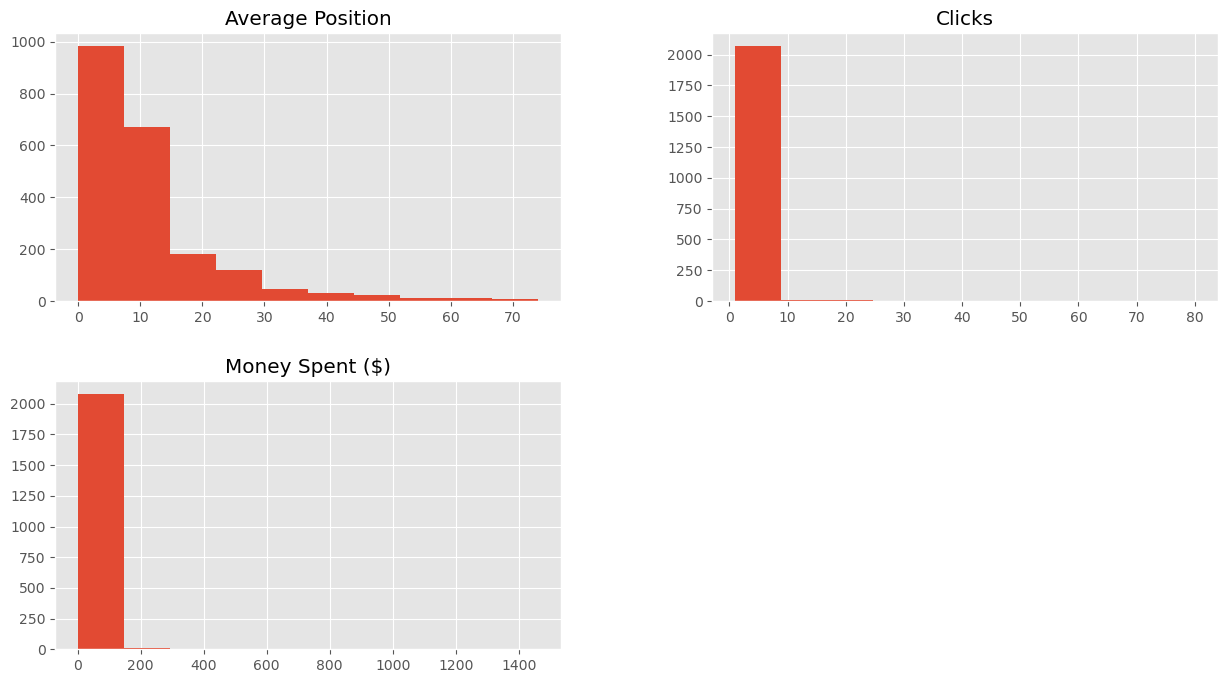

In [44]:
data_ls.hist()
plt.show()

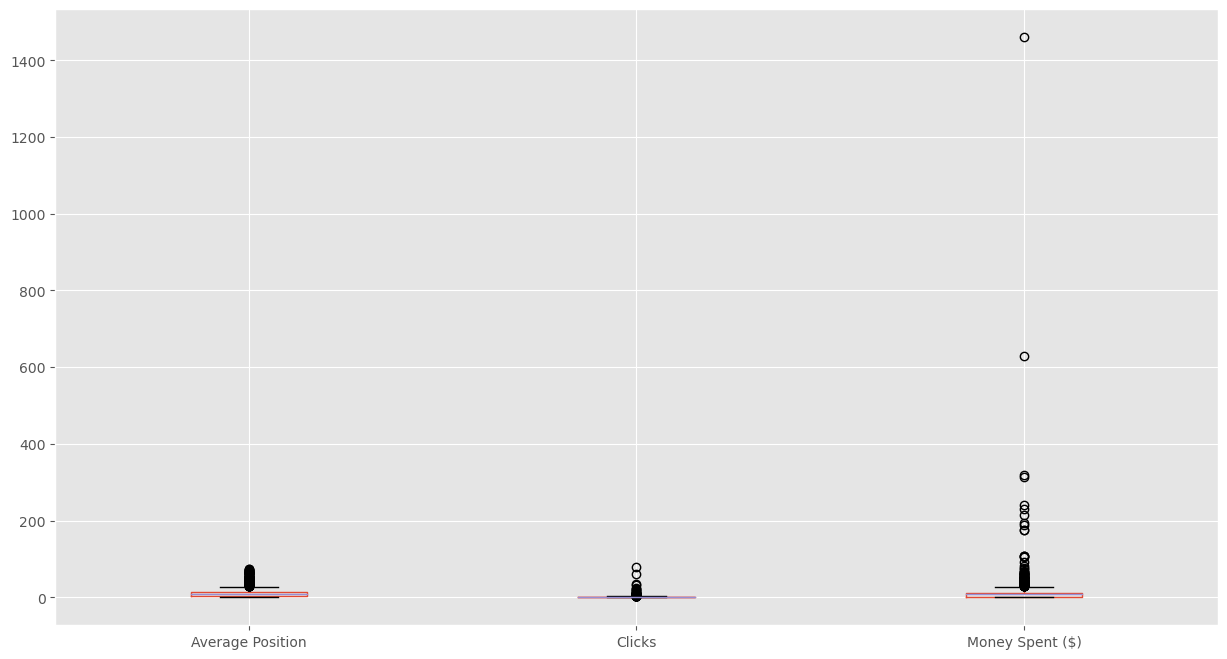

In [45]:
data_ls.boxplot()
plt.show()

In [46]:
data_ls.describe(include='O')

Product Name    Categories       Date of Report   Channel  \
count          2091          2091                 2091      2091   
unique            1            19                  190         3   
top          Omnify  Reservations  2021-02-04 00:00:00  Capterra   
freq           2091           458                   28      1211   

             Location  
count            2091  
unique             14  
top     UNITED STATES  
freq              902

In [47]:
data_ls.describe(exclude='O')

Average Position       Clicks  Money Spent ($)
count       2090.000000  2090.000000      2089.000000
mean          10.731464     1.663636        12.074318
std           11.219817     2.798869        39.172291
min            0.000000     1.000000         2.000000
25%            3.000000     1.000000         2.000000
50%            8.000000     1.000000         7.250000
75%           13.000000     2.000000        12.250000
max           74.000000    80.000000      1460.000000

### Assigned Tasks

1 - Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.

In [48]:
data_ls['Date of Report'] = pd.to_datetime(data_ls['Date of Report'])

data_ls['Week'] = data_ls['Date of Report'].dt.to_period('W').dt.start_time

data_ls['Month'] = data_ls['Date of Report'].dt.to_period('M').dt.start_time

data_ls['ROAS'] = data_ls['Clicks'] / data_ls['Money Spent ($)']

weekly_metrics = data_ls.groupby('Week').agg({
    'Money Spent ($)': 'sum',
    'Clicks': 'sum',
    'ROAS': 'mean'
}).reset_index()

monthly_metrics = data_ls.groupby('Month').agg({
    'Money Spent ($)': 'sum',
    'Clicks': 'sum',
    'ROAS': 'mean'
}).reset_index()

print("Combined Report - Weekly Metrics:")
print(weekly_metrics)

print("Combined Report - Monthly Metrics:")
print(monthly_metrics)


Combined Report - Weekly Metrics:
         Week  Money Spent ($)  Clicks      ROAS
0  2020-10-19            84.00    42.0  0.500000
1  2020-10-26           373.00   103.0  0.444419
2  2020-11-02           679.75    92.0  0.368805
3  2020-11-09          2608.25   241.0  0.363963
4  2020-11-16           443.75   119.0  0.412065
5  2020-11-23           503.50    64.0  0.292526
6  2020-11-30           699.50    90.0  0.172366
7  2020-12-07           973.60   125.0  0.157000
8  2020-12-14           887.20   112.0  0.178946
9  2020-12-21          1292.60   162.0  0.171771
10 2020-12-28          1034.40   138.0  0.177996
11 2021-01-04          1120.25   155.0  0.206763
12 2021-01-11          1513.75   202.0  0.234104
13 2021-01-18          1419.25   185.0  0.256285
14 2021-01-25           386.00    80.0  0.400757
15 2021-02-01          1243.00   179.0  0.261915
16 2021-02-08          1675.25   211.0  0.224300
17 2021-02-15          1103.00   161.0  0.256316
18 2021-02-22           628.15   11

2 - Which is the most profitable channel

In [49]:
data_ls['ROAS'] = data_ls['Clicks'] / data_ls['Money Spent ($)']
channel_roas = data_ls.groupby('Channel')['ROAS'].mean()
most_profitable_channel = channel_roas.idxmax()
max_roas = channel_roas.max()

print("Most Profitable Channel:")
print("Channel:", most_profitable_channel)
print("ROAS:", max_roas)

Most Profitable Channel:
Channel: Software Advice
ROAS: 0.3566825661111375


3 - Which category/keyword is the most profitable

In [51]:
category_roas = data_ls.groupby('Categories')['ROAS'].mean()

most_profitable_category = category_roas.idxmax()
max_roas = category_roas.max()

print("Most Profitable Category:")
print("Category:", most_profitable_category)
print("ROAS:", max_roas)

Most Profitable Category:
Category: Camp Management
ROAS: 0.5


4 - Look for insights by analyzing data points on time series graphs

In [52]:
data_ls.head()

Product Name          Categories Date of Report  Average Position  Clicks  \
0       Omnify            Coaching     2020-10-20              13.0     1.0   
1       Omnify        Dance Studio     2020-10-20              20.0     1.0   
2       Omnify    Personal Trainer     2020-10-20               6.0     1.0   
3       Omnify          Scheduling     2020-10-20              59.0     1.0   
4       Omnify  Class Registration     2020-10-21               6.0     1.0   

   Money Spent ($)   Channel        Location       Week      Month  ROAS  
0              2.0  Capterra   UNITED STATES 2020-10-19 2020-10-01   0.5  
1              2.0  Capterra  UNITED KINGDOM 2020-10-19 2020-10-01   0.5  
2              2.0  Capterra       SINGAPORE 2020-10-19 2020-10-01   0.5  
3              2.0    GetApp   UNITED STATES 2020-10-19 2020-10-01   0.5  
4              2.0  Capterra       AUSTRALIA 2020-10-19 2020-10-01   0.5

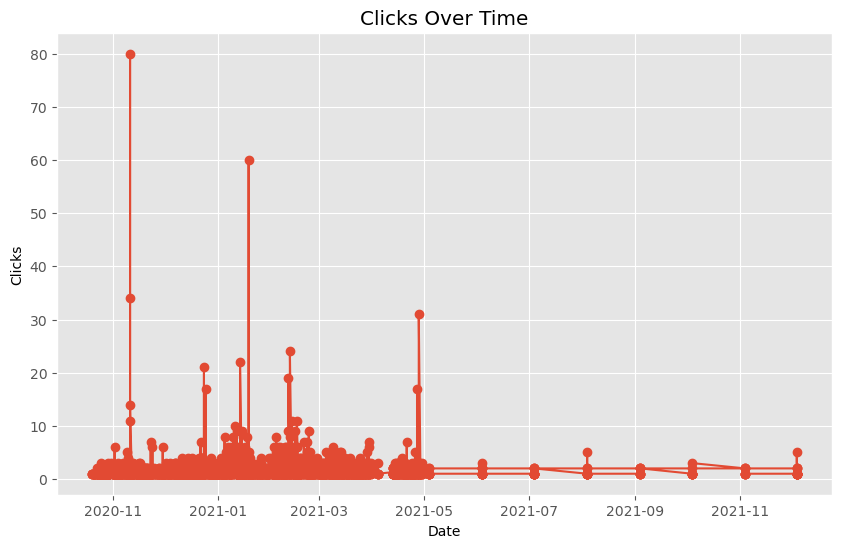

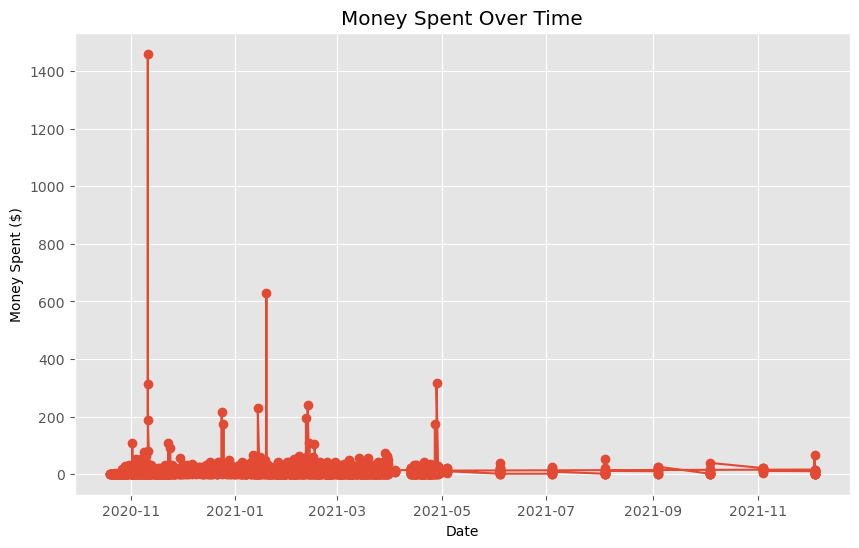

In [53]:
data_ls['Date of Report'] = pd.to_datetime(data_ls['Date of Report'])

# Set 'Date of Report' as the index for time series analysis
data_ls.set_index('Date of Report', inplace=True)

# Plot 'Clicks' over time
plt.figure(figsize=(10, 6))
plt.plot(data_ls['Clicks'], marker='o')
plt.title('Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.show()

# Plot 'Money Spent ($)' over time
plt.figure(figsize=(10, 6))
plt.plot(data_ls['Money Spent ($)'], marker='o')
plt.title('Money Spent Over Time')
plt.xlabel('Date')
plt.ylabel('Money Spent ($)')
plt.show()

**Observation:** Clicks Over Time Has some Changes to Observe ie During These months of these years 2020-11,2021-01,2021-03 and 2021-05 Average Around 45 Clicks were Observed with Maximum in 2020-11 and minimum in 2021-05 and Later that there is a Significant Drop Observed. The Same Issue is Observed With Money Spent Over Time . So the COnclusion is the More MOney Spent on Advertisement more Respone will be Generated else a mere response will be Observed.

5 - Analyse the Impact of geography

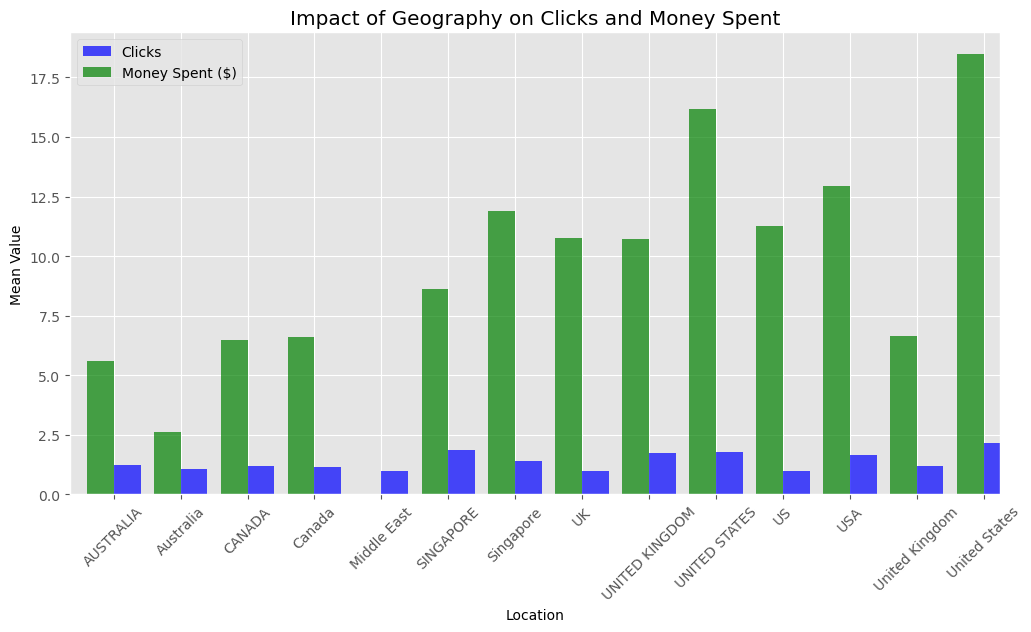

In [54]:
# Plot 'Clicks' and 'Money Spent ($)' for each location
grouped_data = data_ls.groupby('Location')[['Clicks', 'Money Spent ($)']].mean()
plt.figure(figsize=(12, 6))
grouped_data['Clicks'].plot(kind='bar', color='blue', alpha=0.7, width=0.4, position=0, label='Clicks')
grouped_data['Money Spent ($)'].plot(kind='bar', color='green', alpha=0.7, width=0.4, position=1, label='Money Spent ($)')
plt.title('Impact of Geography on Clicks and Money Spent')
plt.xlabel('Location')
plt.ylabel('Mean Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Observation:** We Can Observe that More money is Spent on United States , With Least Money Spent on Middle East but Still Expecting some Clicks. After US , in UK and Singapore money is mostly Spent for Ads Clicks are directly Proportional to money Spent on Advertisement

### Self Evaluation

1 - Time Series Forecasting: We can perform time series forecasting using techniques like ARIMA or SARIMA to predict future values of key metrics such as 'Clicks' and 'Money Spent ($)' based on past observations. This can help in making informed decisions about budget allocation and campaign planning

In [55]:
data=listing_site_df.copy()

C:\Users\K.S.shirodkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\K.S.shirodkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\K.S.shirodkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\K.S.shirodkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\K.S.shirodkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has 

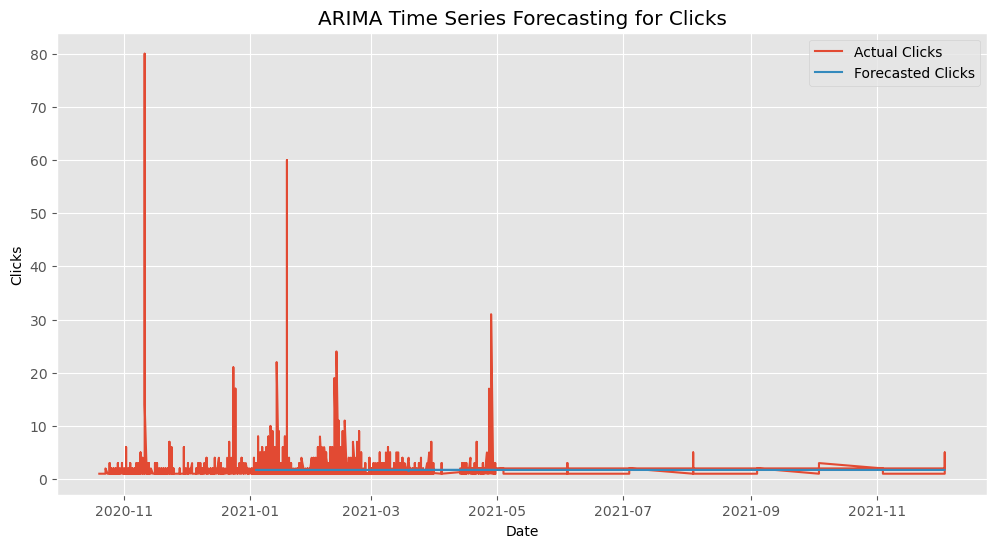

In [56]:
from statsmodels.tsa.arima.model import ARIMA

data['Date of Report'] = pd.to_datetime(data['Date of Report'])

data.set_index('Date of Report', inplace=True)

data.dropna(subset=['Clicks'], inplace=True)

train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

order = (1, 0, 1)  # (p, d, q) order for ARIMA model
model = ARIMA(train_data['Clicks'], order=order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test_data))


plt.figure(figsize=(12, 6))
plt.plot(data['Clicks'], label='Actual Clicks')
plt.plot(test_data.index, forecast, label='Forecasted Clicks')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.title('ARIMA Time Series Forecasting for Clicks')
plt.legend()
plt.show()

C:\Users\K.S.shirodkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\K.S.shirodkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\K.S.shirodkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\K.S.shirodkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\K.S.shirodkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has 

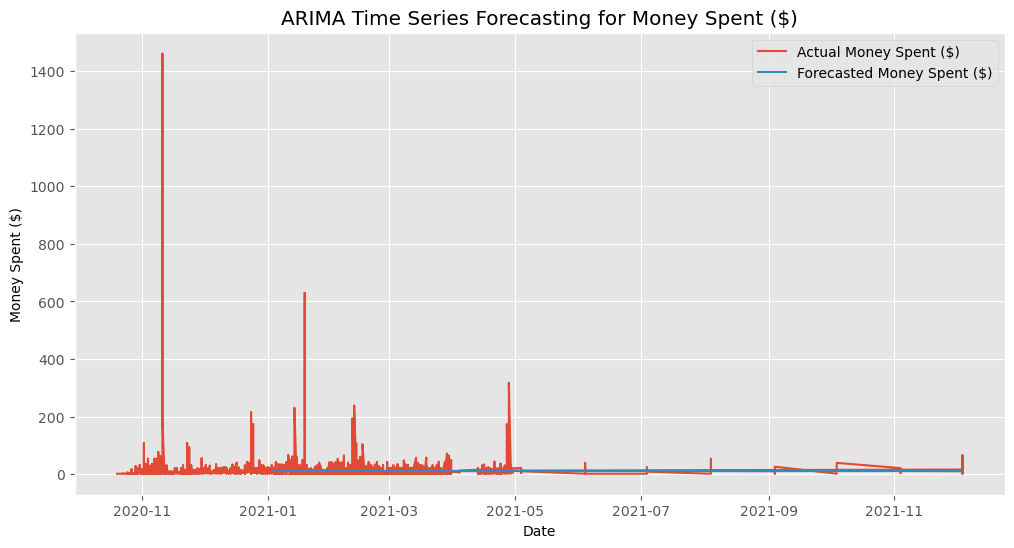

In [57]:
data.dropna(subset=['Money Spent ($)'], inplace=True)


train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

order = (1, 0, 1)  # (p, d, q) order for ARIMA model
model = ARIMA(train_data['Money Spent ($)'], order=order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(12, 6))
plt.plot(data['Money Spent ($)'], label='Actual Money Spent ($)')
plt.plot(test_data.index, forecast, label='Forecasted Money Spent ($)')
plt.xlabel('Date')
plt.ylabel('Money Spent ($)')
plt.title('ARIMA Time Series Forecasting for Money Spent ($)')
plt.legend()
plt.show()

2 - Correlation Matrix

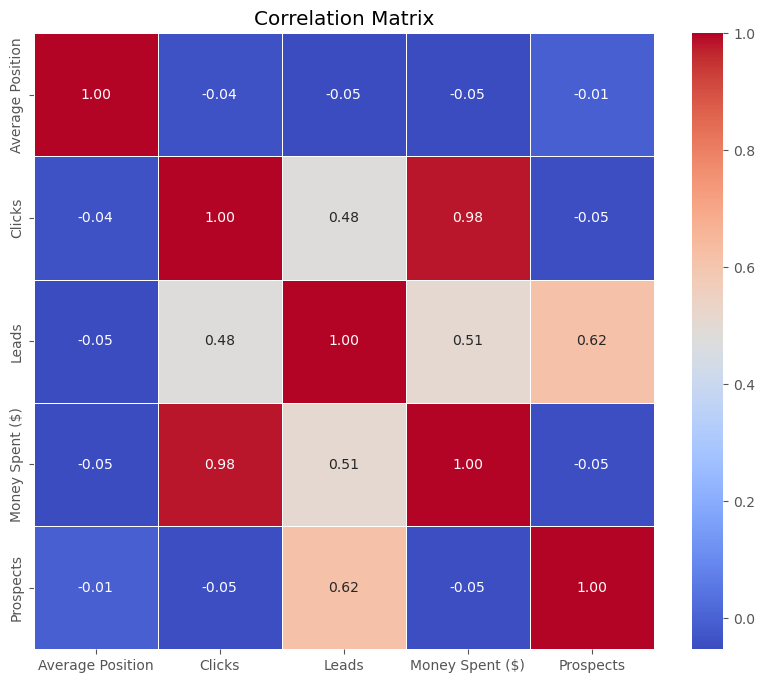

In [58]:
numerical_cols = ['Average Position', 'Clicks', 'Leads', 'Money Spent ($)', 'Prospects']

data = data.dropna(subset=numerical_cols)

correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

3 - Clicks by Location

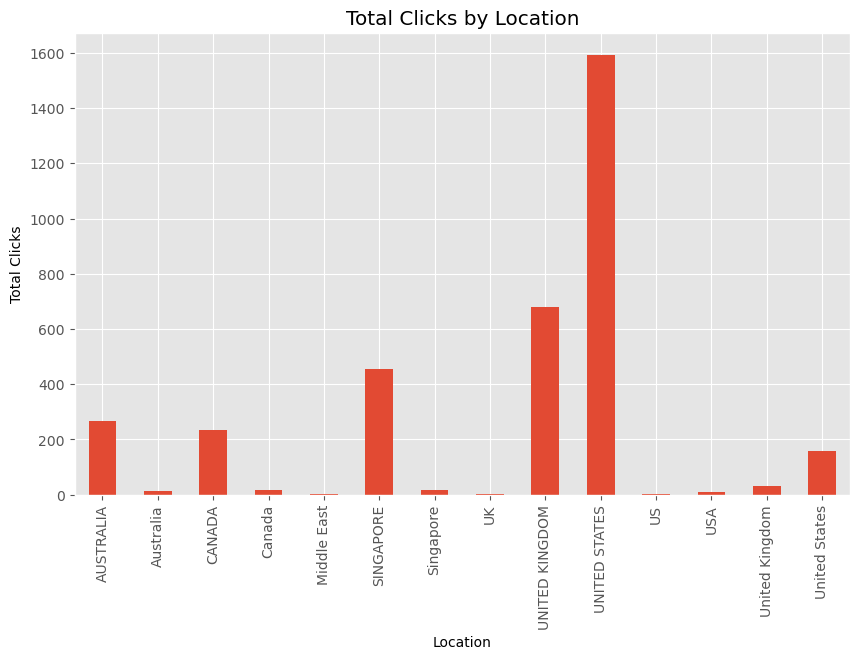

In [59]:
clicks_by_location = data_ls.groupby('Location')['Clicks'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
clicks_by_location.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Total Clicks')
plt.title('Total Clicks by Location')
plt.xticks(rotation=90)
plt.show()

4 - Categorical Variable Analysis: We can perform analysis on categorical variables such as 'Channel' and 'Categories' to understand their impact on key metrics. This can be done using bar plots, box plots, or violin plots to compare the distribution of metrics across different categories

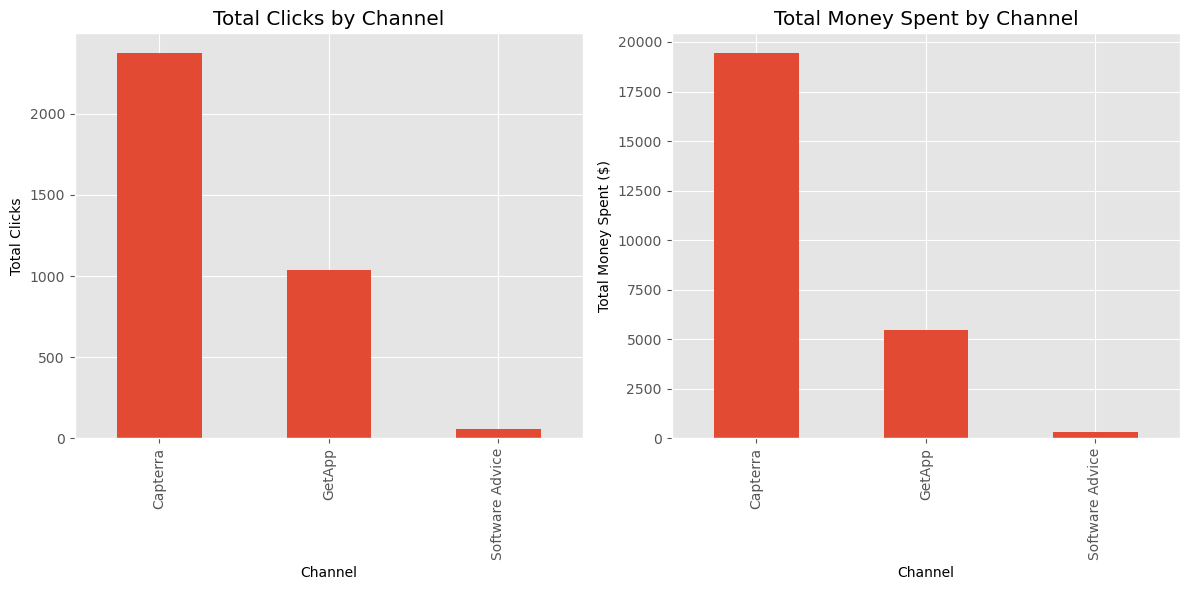

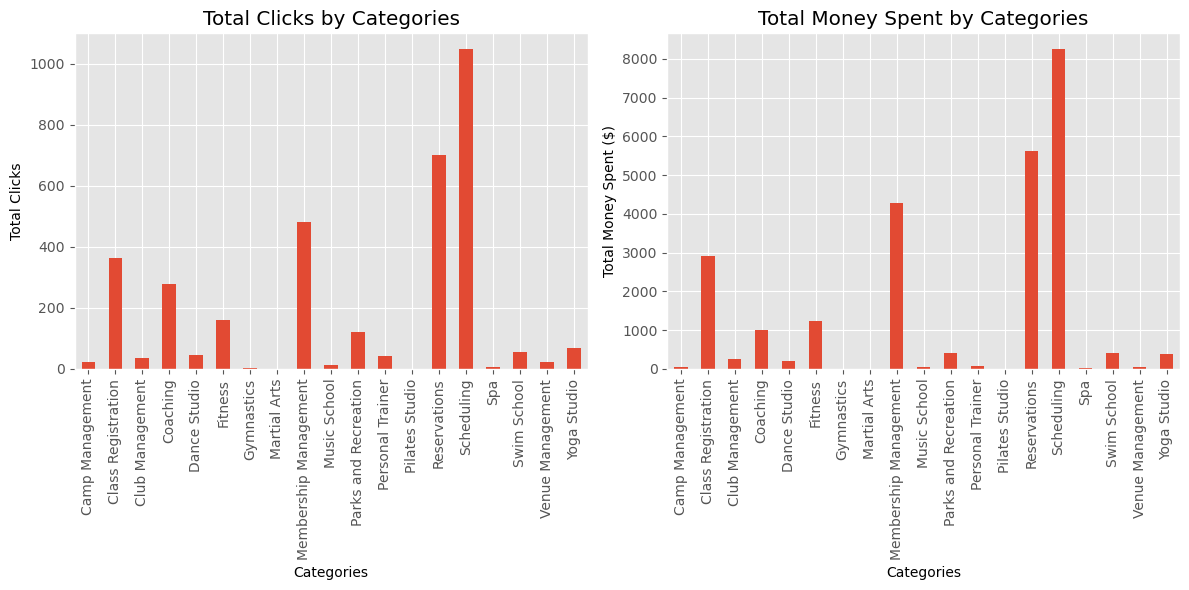

In [60]:
import matplotlib.pyplot as plt

# Create bar plots for 'Channel'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data_ls.groupby('Channel')['Clicks'].sum().plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Total Clicks')
plt.title('Total Clicks by Channel')

plt.subplot(1, 2, 2)
data_ls.groupby('Channel')['Money Spent ($)'].sum().plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Total Money Spent ($)')
plt.title('Total Money Spent by Channel')
plt.tight_layout()
plt.show()

# Create bar plots for 'Categories'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data_ls.groupby('Categories')['Clicks'].sum().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Total Clicks')
plt.title('Total Clicks by Categories')

plt.subplot(1, 2, 2)
data_ls.groupby('Categories')['Money Spent ($)'].sum().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Total Money Spent ($)')
plt.title('Total Money Spent by Categories')
plt.tight_layout()
plt.show()

5 - Hypothesis Testing: We can conduct hypothesis testing to validate certain assumptions or claims about the data. For example, we can test if the mean 'Clicks' for different 'Categories' are significantly different or if there is a significant difference in 'Money Spent ($)' between different 'Channels'

In [61]:
data_ls['Categories'].unique()

array(['Coaching', 'Dance Studio', 'Personal Trainer', 'Scheduling',
       'Class Registration', 'Fitness', 'Swim School', 'Yoga Studio',
       'Camp Management', 'Music School', 'Reservations',
       'Club Management', 'Gymnastics', 'Venue Management',
       'Membership Management', 'Parks and Recreation', 'Spa',
       'Martial Arts', 'Pilates Studio'], dtype=object)

In [62]:
import scipy.stats as stats

# Perform one-way ANOVA for 'Clicks' and 'Categories'
anova_result = stats.f_oneway(*[data_ls[data_ls['Categories'] == category]['Clicks'] for category in data_ls['Categories'].unique()])

# Print the results
print("One-way ANOVA for Clicks and Categories:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

One-way ANOVA for Clicks and Categories:
F-statistic: nan
p-value: nan


In [63]:
data_ls['Channel'].unique()

array(['Capterra', 'GetApp', 'Software Advice'], dtype=object)

In [64]:
# Separate data for each channel
channel1_data = data_ls[data_ls['Channel'] == 'Capterra']['Money Spent ($)']
channel2_data = data_ls[data_ls['Channel'] == 'GetApp']['Money Spent ($)']
channel3_data = data_ls[data_ls['Channel'] == 'Software Advice']['Money Spent ($)']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(channel1_data, channel2_data, nan_policy='omit')

# Print the results
print("Two-sample t-test for Money Spent ($) and Channel:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Two-sample t-test for Money Spent ($) and Channel:
t-statistic: 5.333367664656387
p-value: 1.0713274504273096e-07


In [65]:
data=listing_site_df.copy()

In [66]:
data=data.dropna()

6 - Clustering Analysis: We can perform clustering analysis on the data to group similar campaigns based on their performance metrics. This can help in identifying segments of campaigns that exhibit similar characteristics.

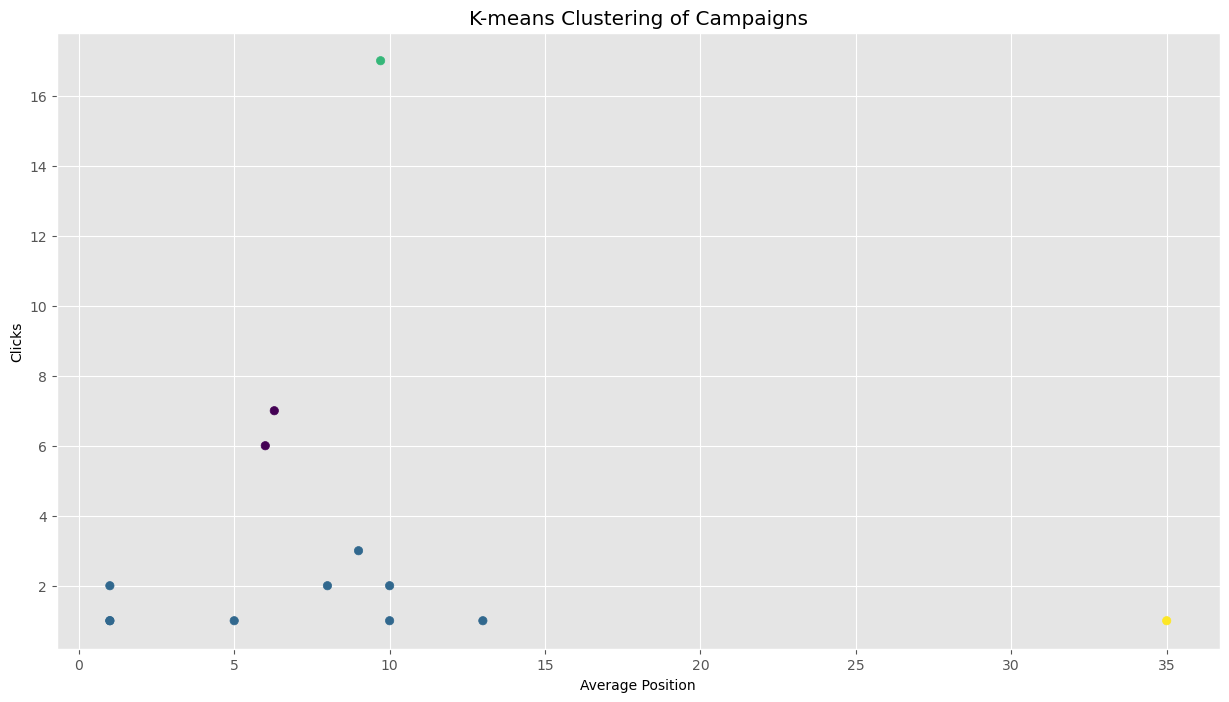

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant performance metrics for clustering
metrics_for_clustering = ['Average Position', 'Clicks', 'Money Spent ($)']

# Create a new DataFrame with selected metrics
data_clustering = data[metrics_for_clustering]

# Drop rows with missing values
data_clustering.dropna(inplace=True)

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering)

# Perform K-means clustering with a pre-defined number of clusters (k)
k = 4  # You can choose the number of clusters based on your business needs
kmeans = KMeans(n_clusters=k, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering_scaled)

# Plot the clusters in 2D space using the first two metrics
plt.scatter(data_clustering['Average Position'], data_clustering['Clicks'], c=data_clustering['Cluster'], cmap='viridis')
plt.xlabel('Average Position')
plt.ylabel('Clicks')
plt.title('K-means Clustering of Campaigns')
plt.show()

8 - Apply Machine Learning To Predict the Clicks and also to Identify The Feature Importance

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
for i in data_ls.select_dtypes(include='O'):
    print(i,'=',data_ls[i].unique())

Product Name = ['Omnify']
Categories = ['Coaching' 'Dance Studio' 'Personal Trainer' 'Scheduling'
 'Class Registration' 'Fitness' 'Swim School' 'Yoga Studio'
 'Camp Management' 'Music School' 'Reservations' 'Club Management'
 'Gymnastics' 'Venue Management' 'Membership Management'
 'Parks and Recreation' 'Spa' 'Martial Arts' 'Pilates Studio']
Channel = ['Capterra' 'GetApp' 'Software Advice']
Location = ['UNITED STATES' 'UNITED KINGDOM' 'SINGAPORE' 'AUSTRALIA' 'CANADA'
 'Middle East' 'USA' 'UK' 'US' 'United States' 'Canada' 'Singapore'
 'United Kingdom' 'Australia']


In [70]:
le=LabelEncoder()
data_ls['Channel']=le.fit_transform(data_ls['Channel'])
data_ls['Location']=le.fit_transform(data_ls['Location'])

In [71]:
data_ls.isnull().sum()

Product Name        0
Categories          0
Average Position    1
Clicks              1
Money Spent ($)     2
Channel             0
Location            0
Week                0
Month               0
ROAS                2
dtype: int64

In [72]:
data_ls=data_ls.dropna()

In [73]:
for i in data_ls.select_dtypes(include=np.number):
    print(i)

Average Position
Clicks
Money Spent ($)
Channel
Location
ROAS


In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
X=data_ls[['Average Position','Money Spent ($)','Channel','Location']]
y=data_ls['Clicks']


rf = RandomForestRegressor(random_state=42)


rf.fit(X,y)

feature_importances = rf.feature_importances_

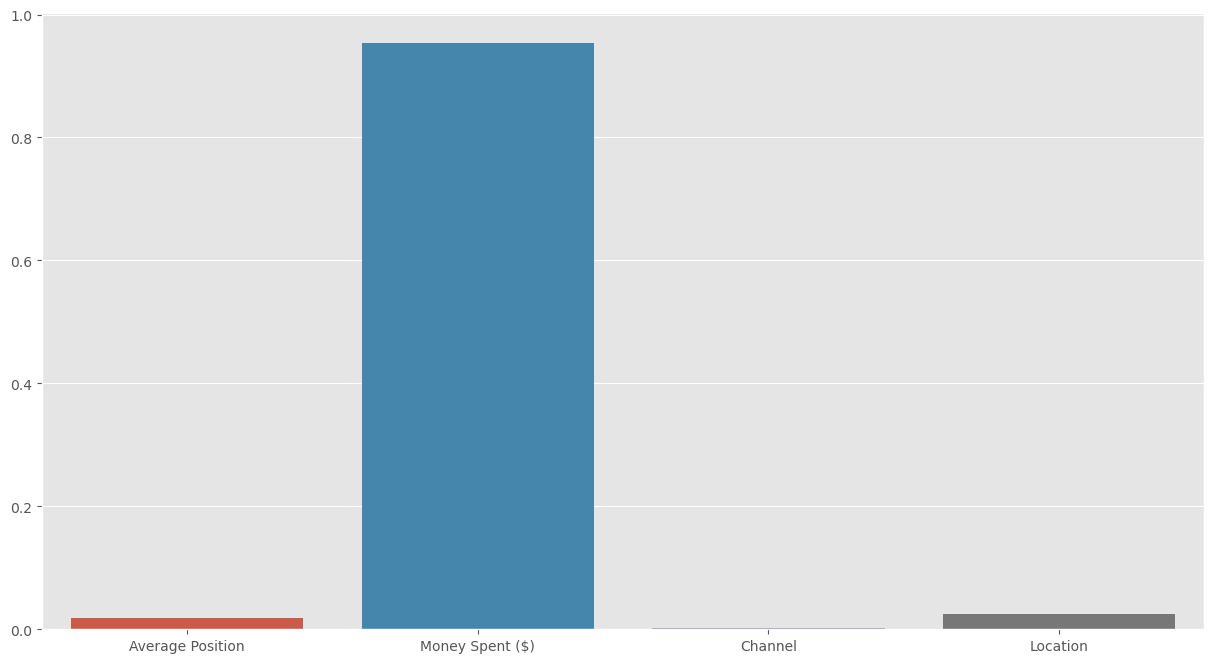

In [77]:
sns.barplot(x=X.columns,y=feature_importances)
plt.show()

Money Spent is the Only Important Column that Is Signifiacantly Affecting the Clicks over Time

## Conclusion

The analysis of both Google Ads and Listed Site Campaign datasets provided valuable insights into campaign performance and helped optimize marketing efforts. By leveraging data-driven strategies and advanced analytical techniques, we were able to identify profitable channels, keywords, and customer segments. These insights can guide future marketing campaigns and contribute to overall business growth.